<a href="https://colab.research.google.com/github/ravellys/PID/blob/master/Lista4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade \#4 - Transformações Baseadas em Tons de Cinza
---
## Universidade Federal de Pernambuco - Departamento de Energia Nuclear
## Processamento de Imagens Digitais
### Aluno - Lucas Ravellys
---

In [ ]:
# Importando bibliotecas
import skimage as sk
import matplotlib.pyplot as plt
import imageio
import numpy as np
import os
from matplotlib import image

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#funções
def im_MinMax(im,bits = 8):
  max_ = 2**bits-1
  s_max = im.max()
  s_min = im.min()
  return (max_*(im - s_min)/(s_max - s_min))

def transform_log(im, c = 1, linear = True):
  if linear:
    return im_MinMax(c*np.log(1+im))
  else:
    return c * np.log(1+im)   

def transform_exp(im, c = 1, linear = True):
  if linear:
    return im_MinMax(c*np.exp(im))
  else:
    return c*np.exp(im)

def transform_pot(im,c = 1, gamma = 1, linear = True):
  if linear:
    return im_MinMax(c*(im)**gamma)
  else:   
    return c*(im)**gamma

## 1) Mostre graficamente o comportamento de s, s = c*ln(1+r), com r variando de 0 a 255 e c = {0,5; 1,0; 1,5; 5,0; 10,0}.
Explique o que deveria ser feito com os valores de s para que pudessem representar intensidade de pixels em uma imagem monocromática de 8 bits.

In [ ]:
# função s
def s(r,c):
  return c*np.log(1+r)

In [ ]:
delta = 1
r = np.arange(0, 255, delta)
c = np.arange(0, 11, .5)
R, C = np.meshgrid(r, c)
S = s(R,C)

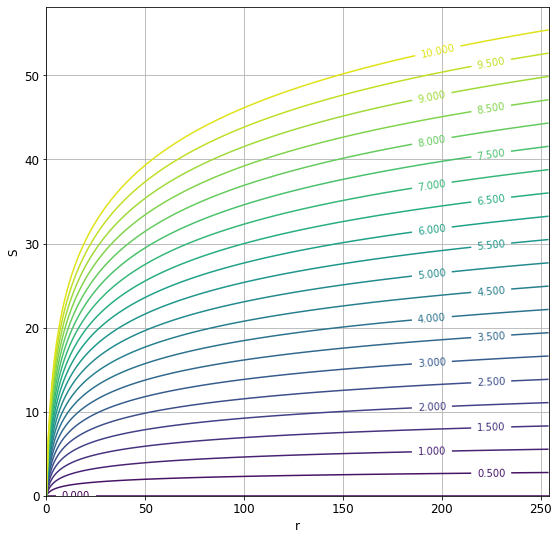

In [ ]:
fig, ax = plt.subplots(figsize = (9,9))
CS = ax.contour(R,S,C,21)
ax.clabel(CS, inline=5, fontsize=10)
plt.grid(True)
ax.set_xlabel('r', fontsize = 12)
ax.set_ylabel('S', fontsize = 12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Para o valor de S representar uma imagem de 8 bits os seus valores devem ser reescalados no intervalo de 0 a 255. Como no procedimento abaixo

In [ ]:
def s_resize(r,c,bits = 8):
  max_ = 2**bits-1
  s_max = (s(r,c)).max()
  s_min = (s(r,c)).min()

  return max_*(s(r,c) - s_min)/(s_max - s_min)

In [ ]:
delta = 1
r = np.arange(0, 255, delta)
c = np.array([.5,1,1.5,5,10])

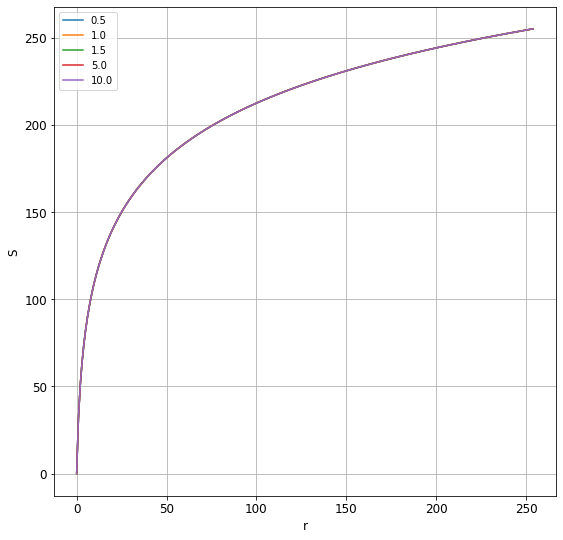

In [ ]:
fig,ax = plt.subplots(figsize=(9,9))
for i in c:
  ax.plot(r,s_resize(r,i), label = str(i))
ax.grid()
ax.set_xlabel('r', fontsize = 12)
ax.set_ylabel('S', fontsize = 12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend()
plt.show()  


##2.

### Pré-processamento da imagem seio

In [ ]:
def img_resize(im,bits = 8):
  max_ = 2**bits-1
  s_max = im.max()
  s_min = im.min()

  return max_*(im - s_min)/(s_max - s_min)

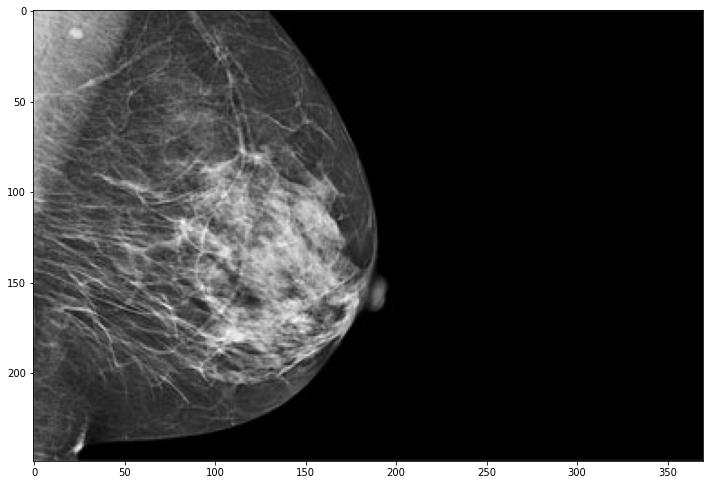

In [ ]:
from skimage import io

file_ = "drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 4/images/Seio.jpg"
img_seio = io.imread(file_, as_gray=True)
fig, ax = plt.subplots(figsize=(12,9))
ax.imshow(img_seio,"gray")
plt.show()

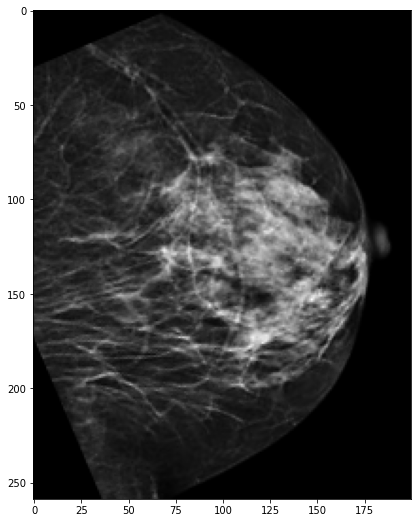

In [ ]:
from skimage.transform import rotate
img_seio_rotate = rotate(img_seio[1:-1,1:-1], 23,resize=True, preserve_range = True)
img_seio_pp = img_resize(img_seio_rotate[91:-21,51:251]) # imagem pos processada

fig, ax = plt.subplots(figsize=(12,9))
ax.imshow(transform_pot(img_seio_pp,1,1.5,True) ,"gray")
plt.show()

### 2.a) Use perfis de linha da imagem Seio.jpg para obter uma lista de tons de cinza limiares das suas regiões. Então segmente esta imagem e obtenha a contagem segmentada dos seus pixels.

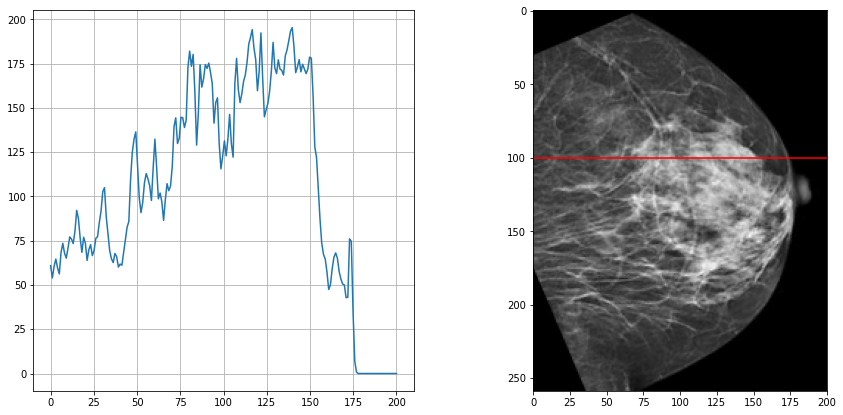

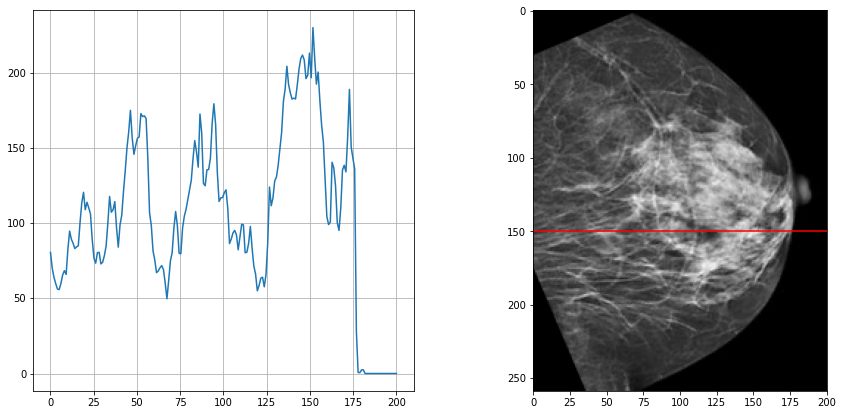

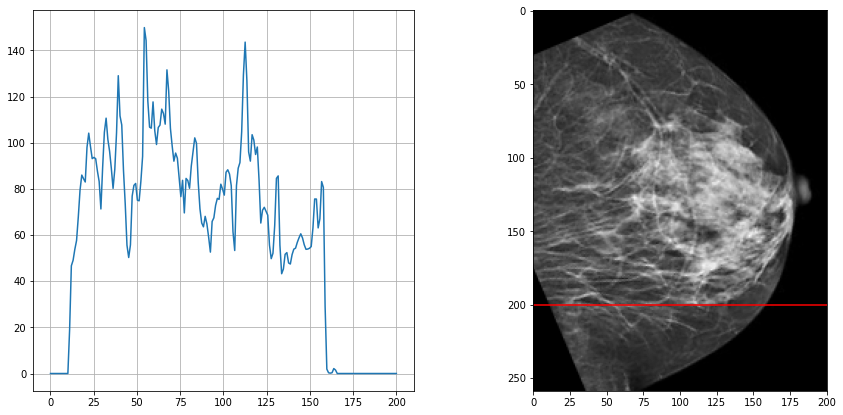

In [ ]:
def im_sec_plot(img,pos = 100):
  leny,lenx = img.shape
  line = img[pos,:]

  x = np.linspace(0,len(line),len(line))
  fig,ax = plt.subplots(ncols=2, figsize = (15,7))
  ax = ax.ravel()

  ax[0].plot(x,line)
  ax[0].grid()

  ax[1].imshow(img,"gray")
  ax[1].hlines(pos, 0, lenx,color = 'red')
  ax[1].set_xlim(0, lenx)

  plt.show()

im_sec_plot(img_seio_pp, 100) 
im_sec_plot(img_seio_pp, 150) 
im_sec_plot(img_seio_pp, 200) 

Segmentação utilizando o limiar superior

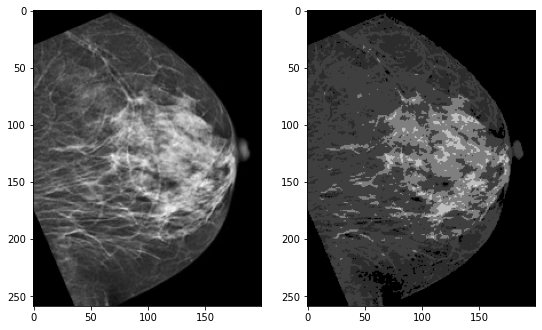

In [ ]:
lim_sup = [0, 45, 63, 127, 191, 255]

img_seio_seg = np.zeros_like(img_seio_pp)
for i in lim_sup:
  img_seio_seg[img_seio_pp >= i] = i

fig, ax = plt.subplots(ncols = 2, figsize = (9,9))
ax =ax.ravel()

ax[0].imshow(img_seio_pp,"gray")
ax[1].imshow(img_seio_seg,"gray")

In [ ]:
for i in lim_sup:
  prop = (img_seio_seg == i).sum()/len(img_seio_seg.ravel())
  print("o % da classe", i, "é de ", round(prop,2))
percent_tumor = (img_seio_seg == lim_sup[-2]).sum()/(img_seio_seg > 0).sum()
print("percentual de tumor no seio é de ", round(percent_tumor,2))  

o % da classe 0 é de  0.34
o % da classe 45 é de  0.17
o % da classe 63 é de  0.35
o % da classe 127 é de  0.12
o % da classe 191 é de  0.02
o % da classe 255 é de  0.0
percentual de tumor no seio é de  0.03


Segmentação utilizando o algoritmo MultiOtsu

In [ ]:
from skimage import data
from skimage.filters import threshold_multiotsu

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(img_seio_pp,5)

# Using the threshold values, we generate the three regions.
img_seios_seg_MO = np.digitize(img_seio_pp, bins=thresholds)

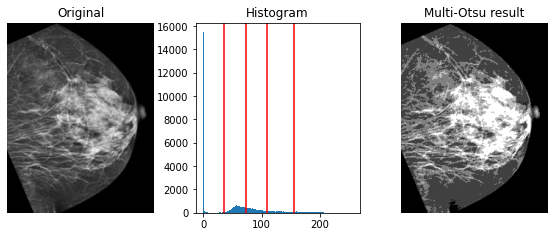

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(img_seio_pp, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from multi-Otsu.
ax[1].hist(img_seio_pp.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(img_seios_seg_MO, cmap='gray')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

### 2.b) Calcule a área do tumor na imagem com relação à área do seio.


In [ ]:
for i in range(img_seios_seg_MO.max()+1):
  prop = (img_seios_seg_MO == i).sum()/len(img_seios_seg_MO.ravel())
  print("o % da classe", i, "é de ", round(prop,2))
 

o % da classe 0 é de  0.32
o % da classe 1 é de  0.29
o % da classe 2 é de  0.2
o % da classe 3 é de  0.11
o % da classe 4 é de  0.08


Como a classe 4 é considerada como tumor e a classe 0 é o fundo, temos que:

In [ ]:
percent_tumor = (img_seios_seg_MO == 4).sum()/(img_seios_seg_MO > 0).sum()
print("percentual de tumor no seio é de ", round(percent_tumor,2))

percentual de tumor no seio é de  0.12


### 2.c) Obtenha a negativa da imagem Seio.jpg, calcule a área do tumor em relação à do seio e compare seu resultado com o obtido em 2-b, indicando se foi mais seguro realizar os cálculos com a imagem original ou o seu negativo.

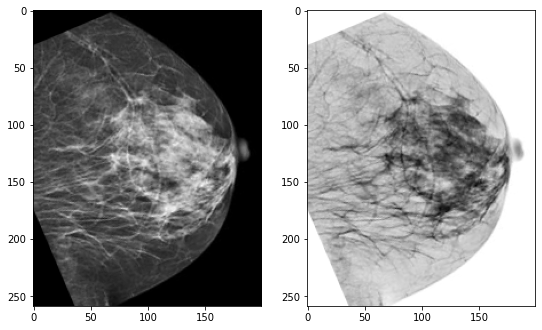

In [ ]:
img_seio_neg = transform_pot(img_seio_pp, c = -1 )

fig, ax = plt.subplots(ncols = 2, figsize = (9,9))
ax =ax.ravel()

ax[0].imshow(img_seio_pp,"gray")
ax[1].imshow(img_seio_neg,"gray")

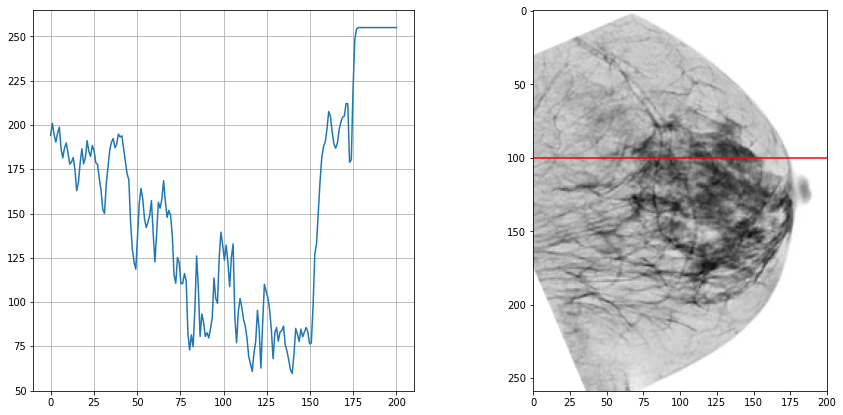

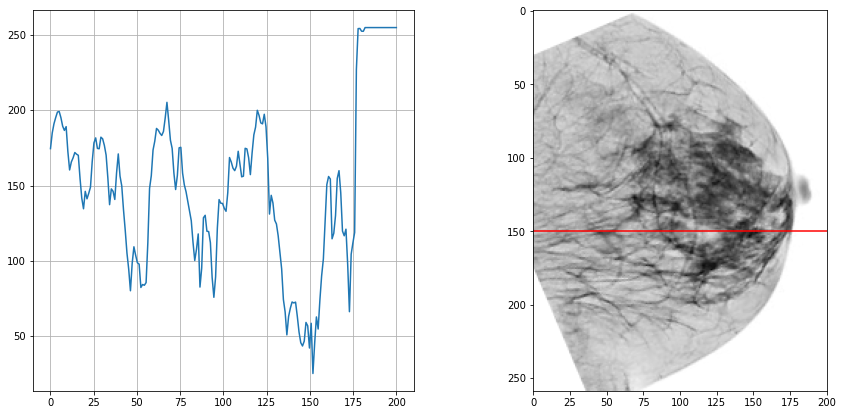

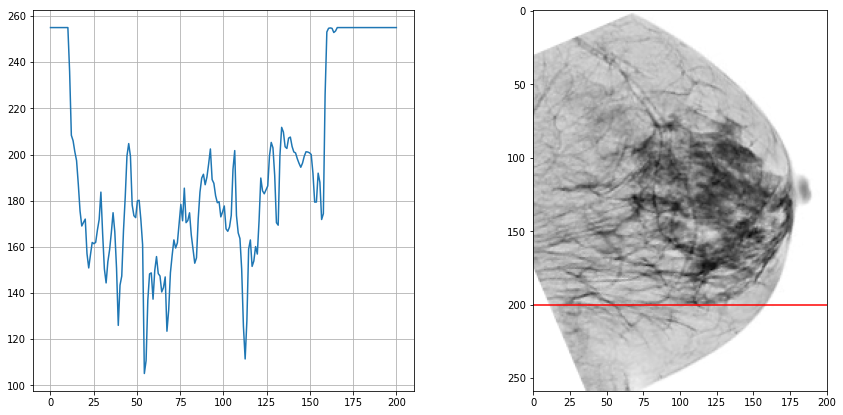

In [ ]:
im_sec_plot(img_seio_neg, 100) 
im_sec_plot(img_seio_neg, 150) 
im_sec_plot(img_seio_neg, 200)

Segmentação utilizando o algoritmo MultiOtsu

In [ ]:
from skimage import data
from skimage.filters import threshold_multiotsu

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(img_seio_neg,6)

# Using the threshold values, we generate the three regions.
img_seios_neg_MO = np.digitize(img_seio_neg, bins=thresholds)

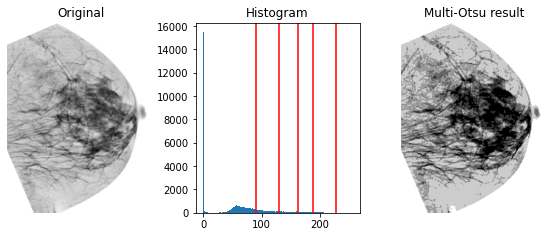

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(img_seio_neg, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from multi-Otsu.
ax[1].hist(img_seio_pp.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(img_seios_neg_MO, cmap='gray')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [ ]:
for i in range(img_seios_neg_MO.max()+1):
  prop = (img_seios_neg_MO == i).sum()/len(img_seios_neg_MO.ravel())
  print("o % da classe", i, "é de ", round(prop,2))

percent_tumor = (img_seios_neg_MO == 0).sum()/(img_seios_neg_MO < 5).sum()
print("percentual de tumor no seio é de ", round(percent_tumor,2))
 

o % da classe 0 é de  0.06
o % da classe 1 é de  0.08
o % da classe 2 é de  0.11
o % da classe 3 é de  0.19
o % da classe 4 é de  0.24
o % da classe 5 é de  0.32
percentual de tumor no seio é de  0.09


A análise com a imagem do seio negativa mostrou-se mais promissora na detecção do tumor.

### 3.

### Use a imagem Recife.jpg e tente melhorar a visualização do seu conteúdo usando transformações linear, exponencial e potencial. Compare os melhores resultados das transformações e indique qual o melhor procedimento para este tipo de imagem.


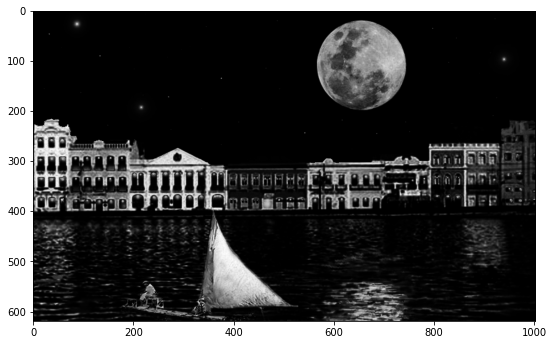

In [ ]:
# importação da imagem
from skimage import io
file_ = "drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 4/images/Recife.jpg"
img_recife = io.imread(file_, as_gray=True)
fig, ax = plt.subplots(figsize=(9,12))
ax.imshow(img_recife,"gray")
plt.show()

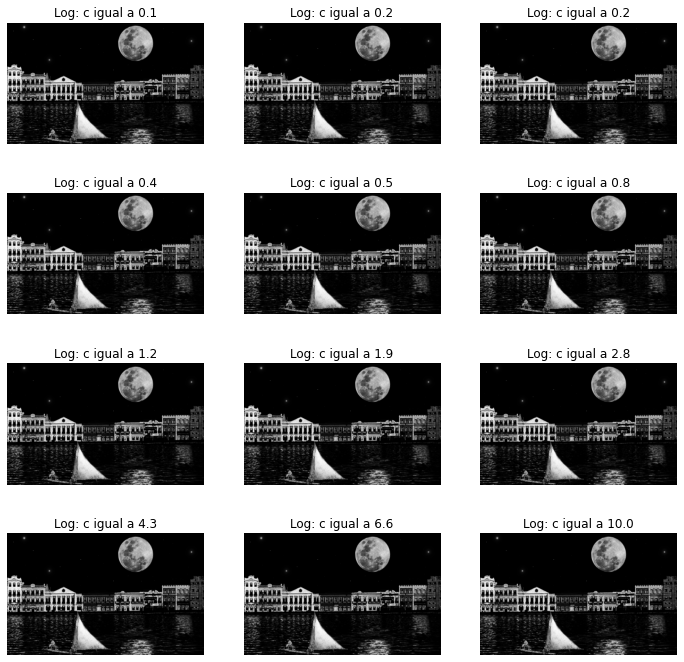

In [ ]:
c = np.logspace(-1,1,12)
n = len(c)
fig, ax = plt.subplots(ncols = 3, nrows =  round(n/3), figsize = (12,12))
ax = ax.ravel()

for ax_,c_ in zip(ax,c): 
  img = transform_log(img_recife, c_, linear = False)
  ax_.imshow(img,"gray")
  ax_.set_title("Log: c igual a "+str(round(c_,1)))
  ax_.axis('off')
plt.show()

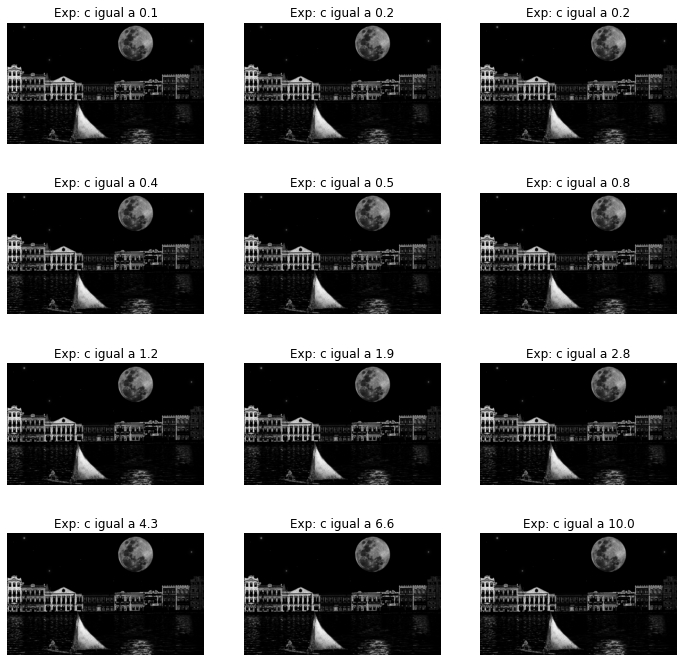

In [ ]:
c = np.logspace(-1,1,12)
n = len(c)

fig, ax = plt.subplots(ncols = 3, nrows =  round(n/3), figsize = (12,12))
ax = ax.ravel()

for ax_,c_ in zip(ax,c): 
  img = transform_exp(img_recife, c_, linear = False)
  ax_.imshow(img,"gray")
  ax_.set_title("Exp: c igual a "+str(round(c_,1)))
  ax_.axis('off')
plt.show()

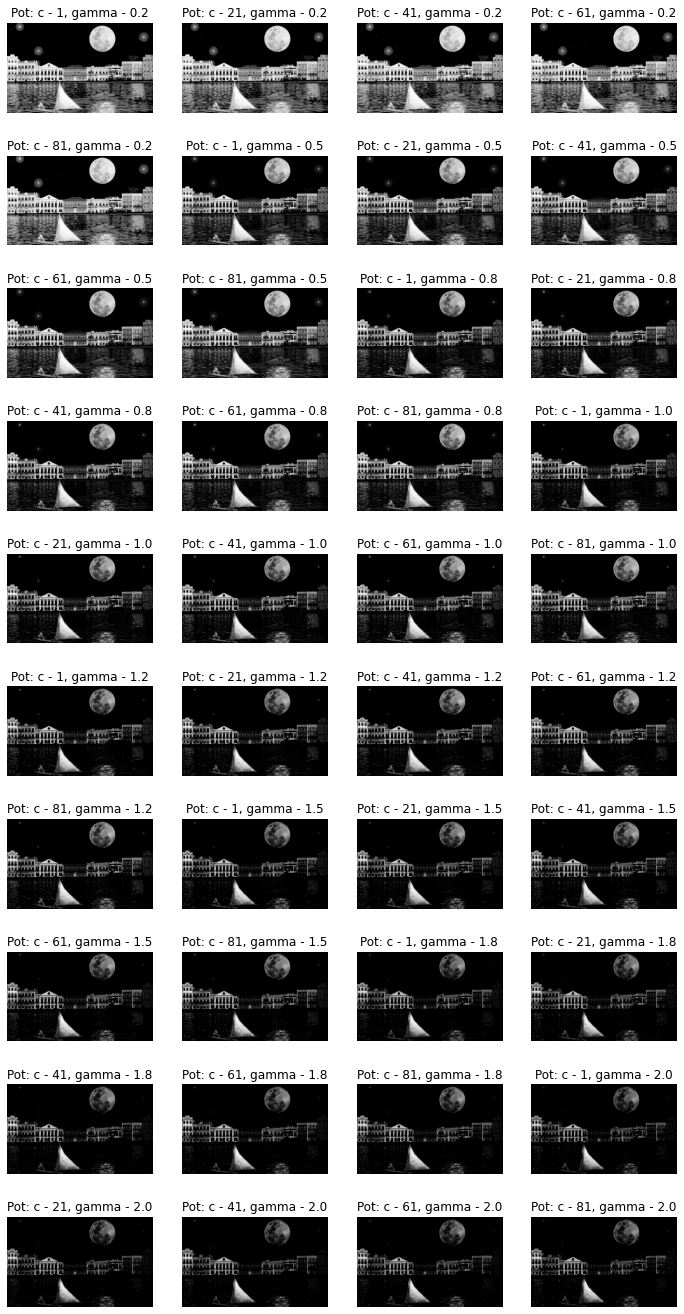

In [ ]:
c = np.arange(1, 101, 20)
gamma = np.arange(0.25, 2.25, .25)
C, GAMMA = np.meshgrid(c, gamma)
n = len(C.ravel())

fig, ax = plt.subplots(ncols = 4, nrows =  round(n/4), figsize = (12,24))
ax = ax.ravel()

for ax_,c_,gamma_ in zip(ax, C.ravel(), GAMMA.ravel()): 
  img = transform_pot(img_recife, c = c_, gamma = gamma_, linear = False)
  ax_.imshow(img,"gray")
  ax_.set_title("Pot: c - "+str(round(c_,1))+", gamma - "+str(round(gamma_,1)))
  ax_.axis('off')
plt.show()

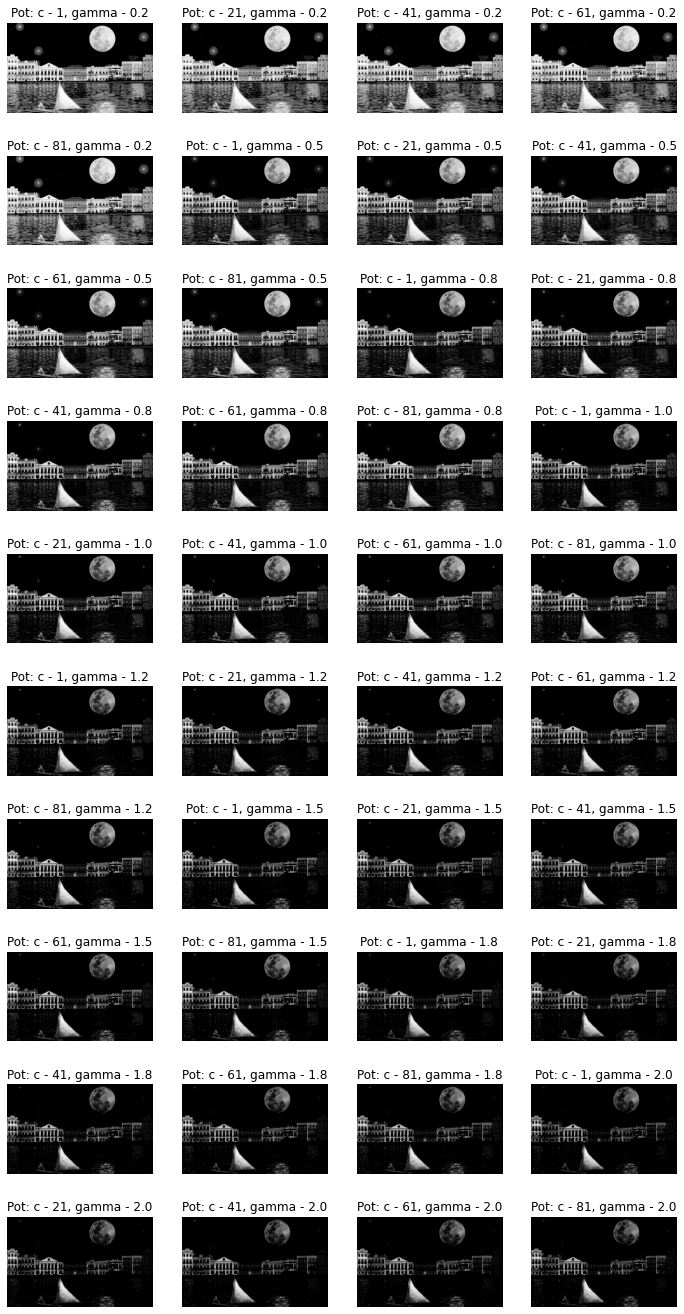

In [ ]:
c = np.arange(1, 101, 20)
gamma = np.arange(0.25, 2.25, .25)
C, GAMMA = np.meshgrid(c, gamma)
n = len(C.ravel())

fig, ax = plt.subplots(ncols = 4, nrows =  round(n/4), figsize = (12,24))
ax = ax.ravel()

for ax_,c_,gamma_ in zip(ax, C.ravel(), GAMMA.ravel()): 
  img = transform_pot(img_recife, c = c_, gamma = gamma_, linear = True)
  ax_.imshow(img,"gray")
  ax_.set_title("Pot: c - "+str(round(c_,1))+", gamma - "+str(round(gamma_,1)))
  ax_.axis('off')
plt.show()

Foi possível observar que a melhor transformação foi a com c = 1 e gamma = .5 com o processo de linearização posterior

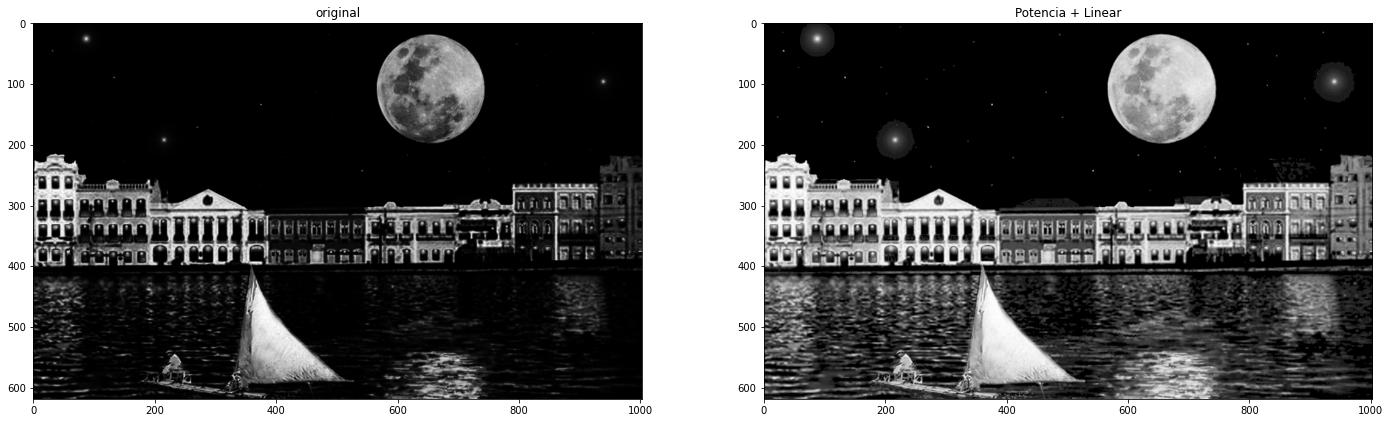

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize=(24,12))
ax = ax.ravel()

ax[1].imshow(transform_pot(img_recife, c = 1, gamma = .4, linear = True),"gray")
ax[1].set_title('Potencia + Linear')

ax[0].imshow(img_recife, "gray")
ax[0].set_title('original')

plt.show()

### 4.

Repita a questão 3 para a imagem Cidade.jpg

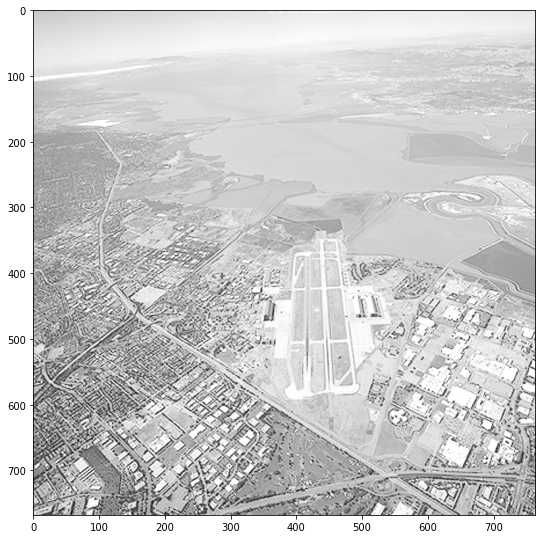

In [ ]:
# importação da imagem
from skimage import io
file_ = "drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 4/images/Cidade.jpg"
img_cidade = io.imread(file_, as_gray=True)
fig, ax = plt.subplots(figsize=(9,12))
ax.imshow(img_cidade,"gray")
plt.show()

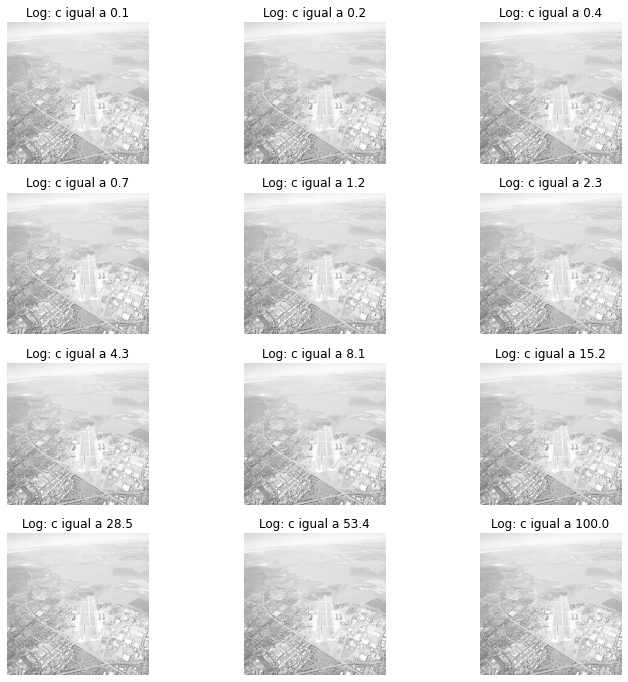

In [ ]:
c = np.logspace(-1,2,12)
n = len(c)
fig, ax = plt.subplots(ncols = 3, nrows =  round(n/3), figsize = (12,12))
ax = ax.ravel()

for ax_,c_ in zip(ax,c): 
  img = transform_log(img_cidade, c_, linear = False)
  ax_.imshow(img,"gray")
  ax_.set_title("Log: c igual a "+str(round(c_,1)))
  ax_.axis('off')
plt.show()

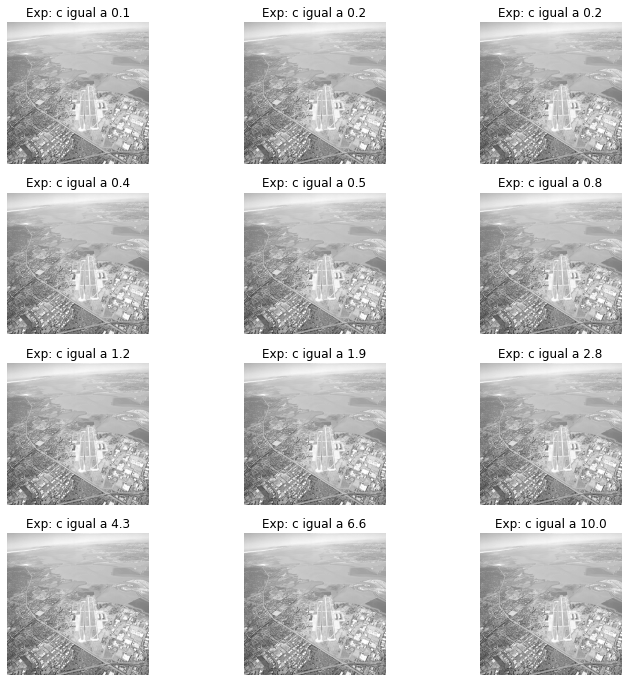

In [ ]:
c = np.logspace(-1,1,12)
n = len(c)

fig, ax = plt.subplots(ncols = 3, nrows =  round(n/3), figsize = (12,12))
ax = ax.ravel()

for ax_,c_ in zip(ax,c): 
  img = transform_exp(img_cidade, c_, linear = False)
  ax_.imshow(img,"gray")
  ax_.set_title("Exp: c igual a "+str(round(c_,1)))
  ax_.axis('off')
plt.show()

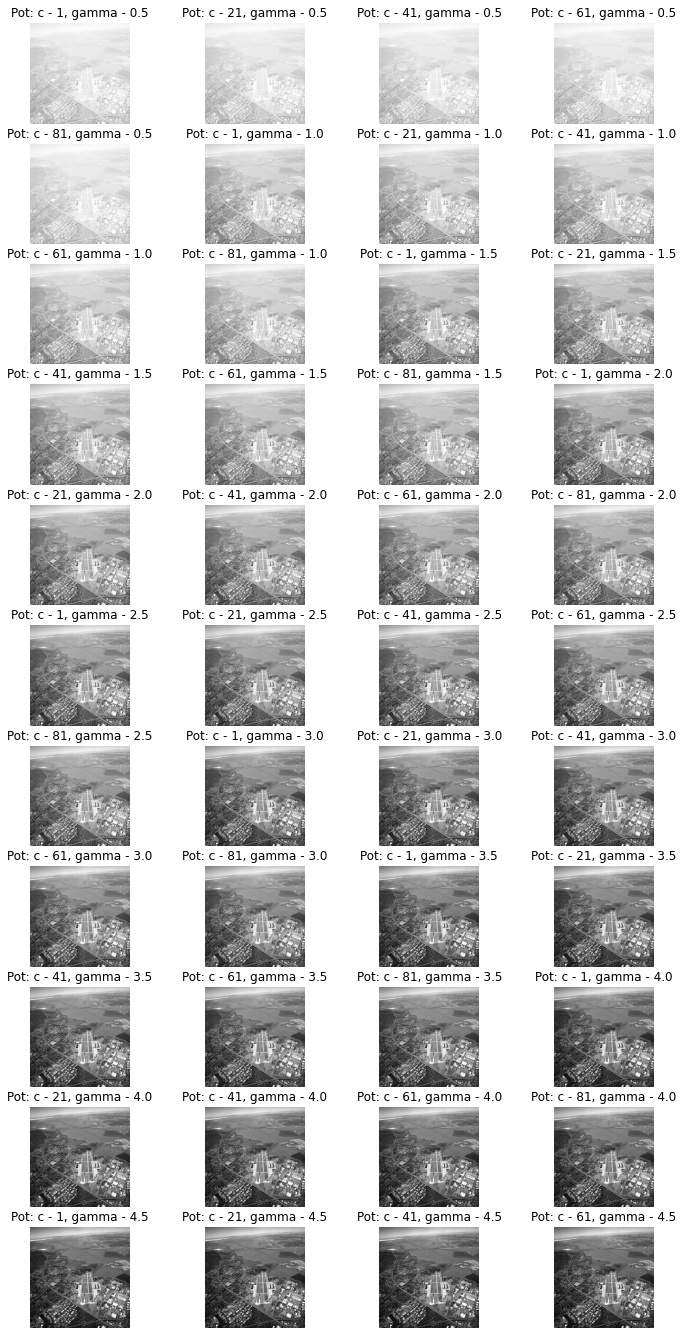

In [ ]:
c = np.arange(1, 101, 20)
gamma = np.arange(0.5, 5, .5)
C, GAMMA = np.meshgrid(c, gamma)
n = len(C.ravel())

fig, ax = plt.subplots(ncols = 4, nrows =  round(n/4), figsize = (12,24))
ax = ax.ravel()

for ax_,c_,gamma_ in zip(ax, C.ravel(), GAMMA.ravel()): 
  img = transform_pot(img_cidade, c = c_, gamma = gamma_, linear = False)
  ax_.imshow(img,"gray")
  ax_.set_title("Pot: c - "+str(round(c_,1))+", gamma - "+str(round(gamma_,1)))
  ax_.axis('off')
plt.show()

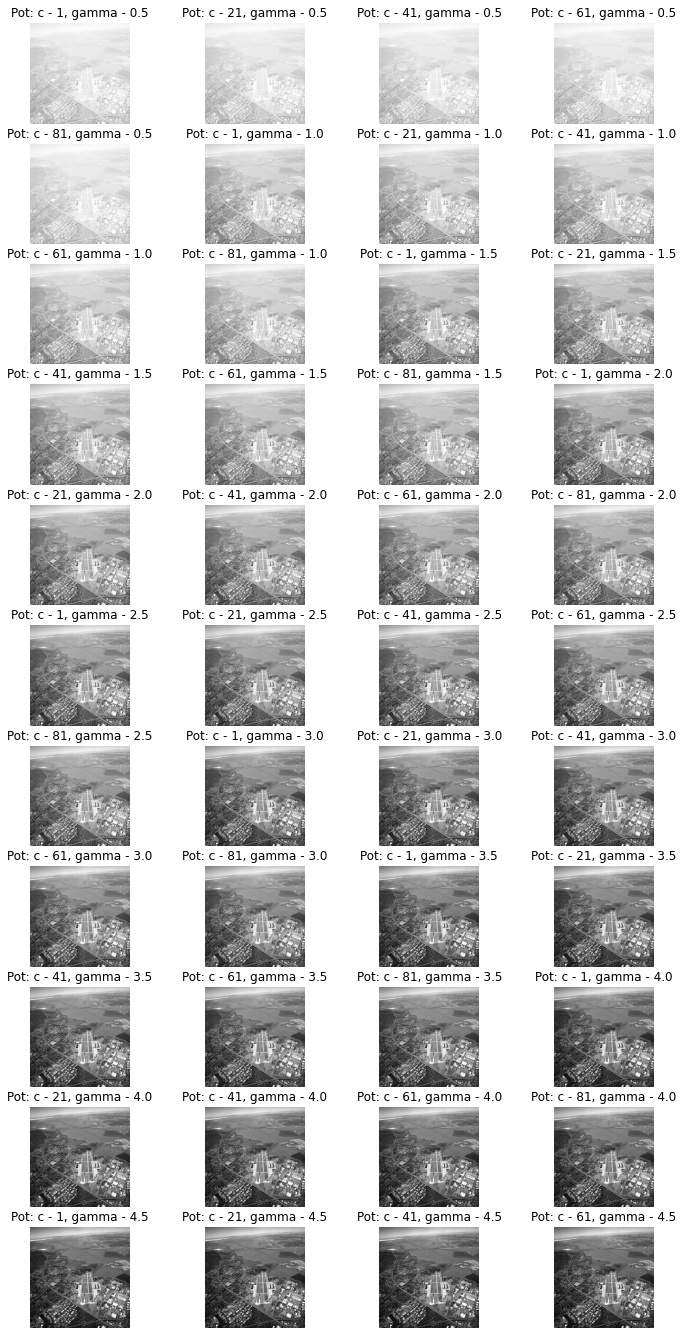

In [ ]:
c = np.arange(1, 101, 20)
gamma = np.arange(0.5, 5, .5)
C, GAMMA = np.meshgrid(c, gamma)
n = len(C.ravel())

fig, ax = plt.subplots(ncols = 4, nrows =  round(n/4), figsize = (12,24))
ax = ax.ravel()

for ax_,c_,gamma_ in zip(ax, C.ravel(), GAMMA.ravel()): 
  img = transform_pot(img_cidade, c = c_, gamma = gamma_, linear = True)
  ax_.imshow(img,"gray")
  ax_.set_title("Pot: c - "+str(round(c_,1))+", gamma - "+str(round(gamma_,1)))
  ax_.axis('off')
plt.show()

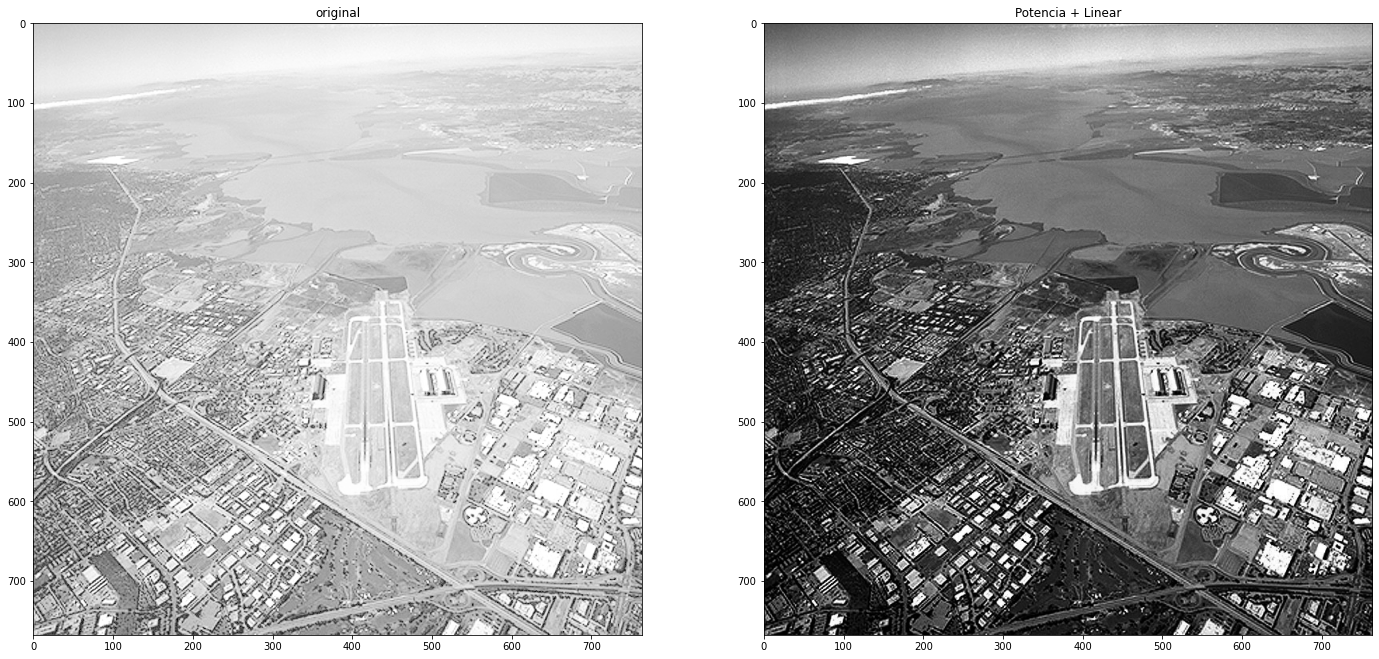

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize=(24,12))
ax = ax.ravel()

ax[1].imshow(transform_pot(img_cidade, c = 21, gamma = 4.5, linear = True),"gray")
ax[1].set_title('Potencia + Linear')

ax[0].imshow(img_cidade, "gray")
ax[0].set_title('original')

plt.show()

### 5.

Repita a questão 3 para a imagem Pacaembu.jpg

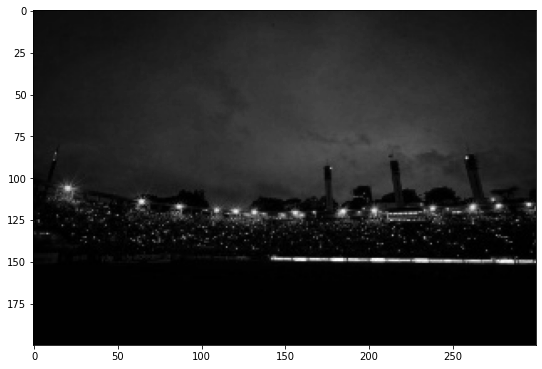

In [ ]:
# importação da imagem
from skimage import io
file_ = "drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 4/images/Pacaembu.png"
img_pacaembu = io.imread(file_, as_gray=True)
fig, ax = plt.subplots(figsize=(9,12))
ax.imshow(img_pacaembu,"gray")
plt.show()

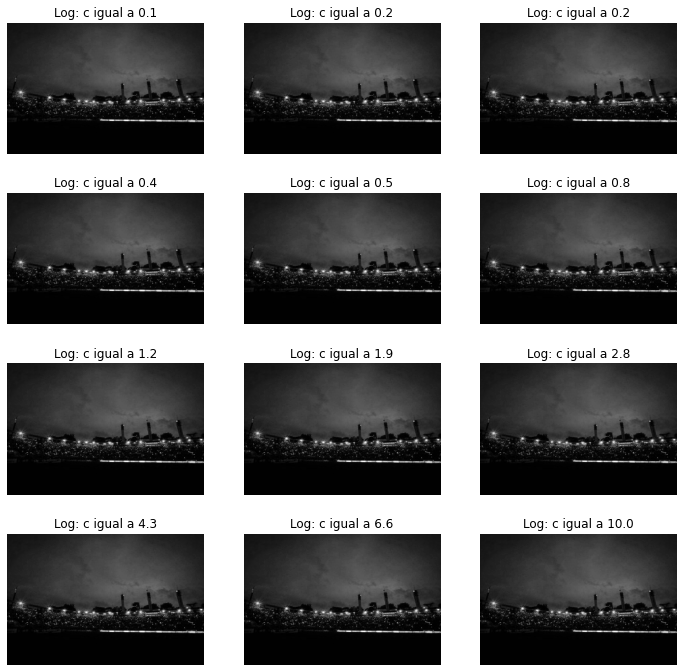

In [ ]:
c = np.logspace(-1,1,12)
n = len(c)
fig, ax = plt.subplots(ncols = 3, nrows =  round(n/3), figsize = (12,12))
ax = ax.ravel()

for ax_,c_ in zip(ax,c): 
  img = transform_log(img_pacaembu, c_, linear = False)
  ax_.imshow(img,"gray")
  ax_.set_title("Log: c igual a "+str(round(c_,1)))
  ax_.axis('off')
plt.show()

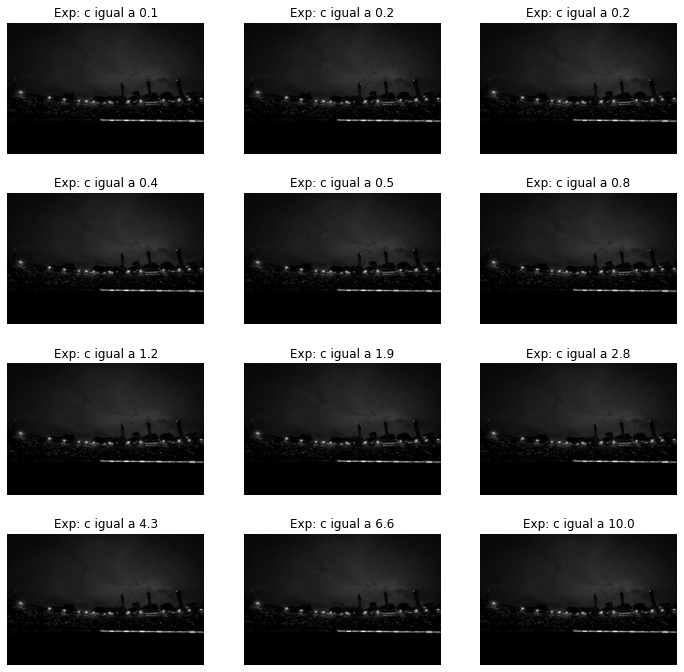

In [ ]:
c = np.logspace(-1,1,12)
n = len(c)

fig, ax = plt.subplots(ncols = 3, nrows =  round(n/3), figsize = (12,12))
ax = ax.ravel()

for ax_,c_ in zip(ax,c): 
  img = transform_exp(img_pacaembu, c_, linear = False)
  ax_.imshow(img,"gray")
  ax_.set_title("Exp: c igual a "+str(round(c_,1)))
  ax_.axis('off')
plt.show()

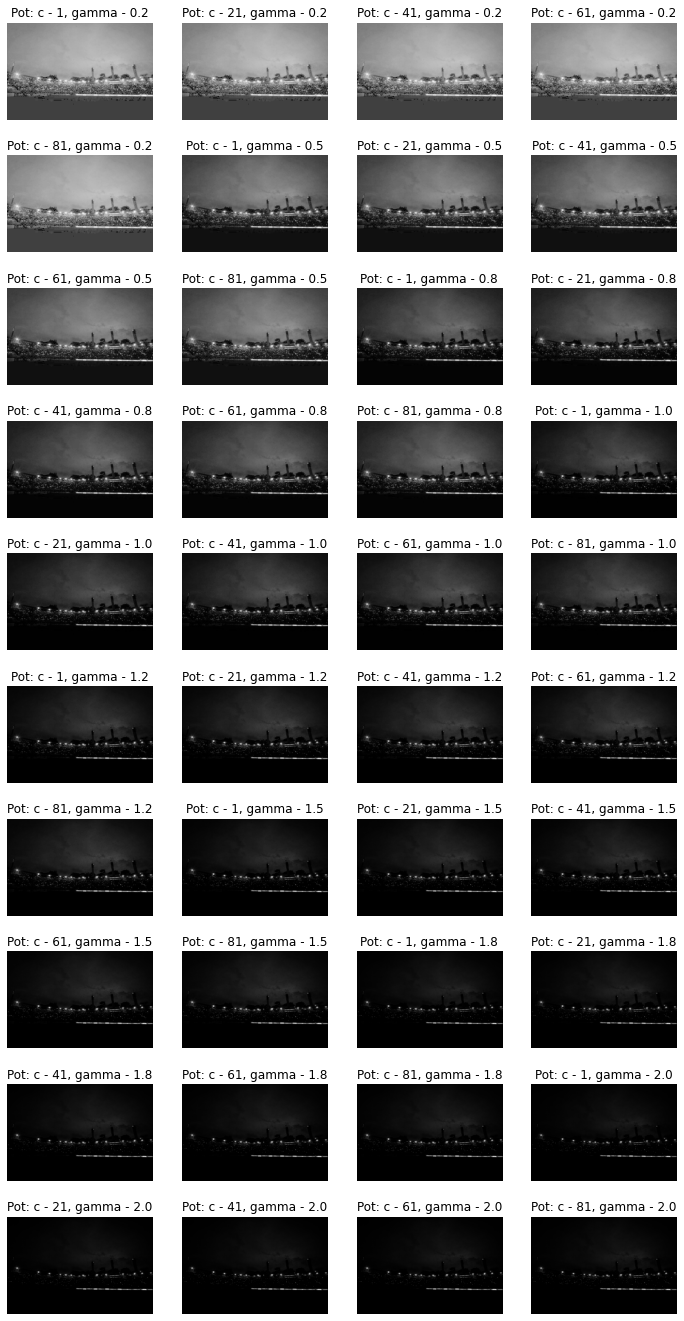

In [ ]:
c = np.arange(1, 101, 20)
gamma = np.arange(0.25, 2.25, .25)
C, GAMMA = np.meshgrid(c, gamma)
n = len(C.ravel())

fig, ax = plt.subplots(ncols = 4, nrows =  round(n/4), figsize = (12,24))
ax = ax.ravel()

for ax_,c_,gamma_ in zip(ax, C.ravel(), GAMMA.ravel()): 
  img = transform_pot(img_pacaembu, c = c_, gamma = gamma_, linear = False)
  ax_.imshow(img,"gray")
  ax_.set_title("Pot: c - "+str(round(c_,1))+", gamma - "+str(round(gamma_,1)))
  ax_.axis('off')
plt.show()

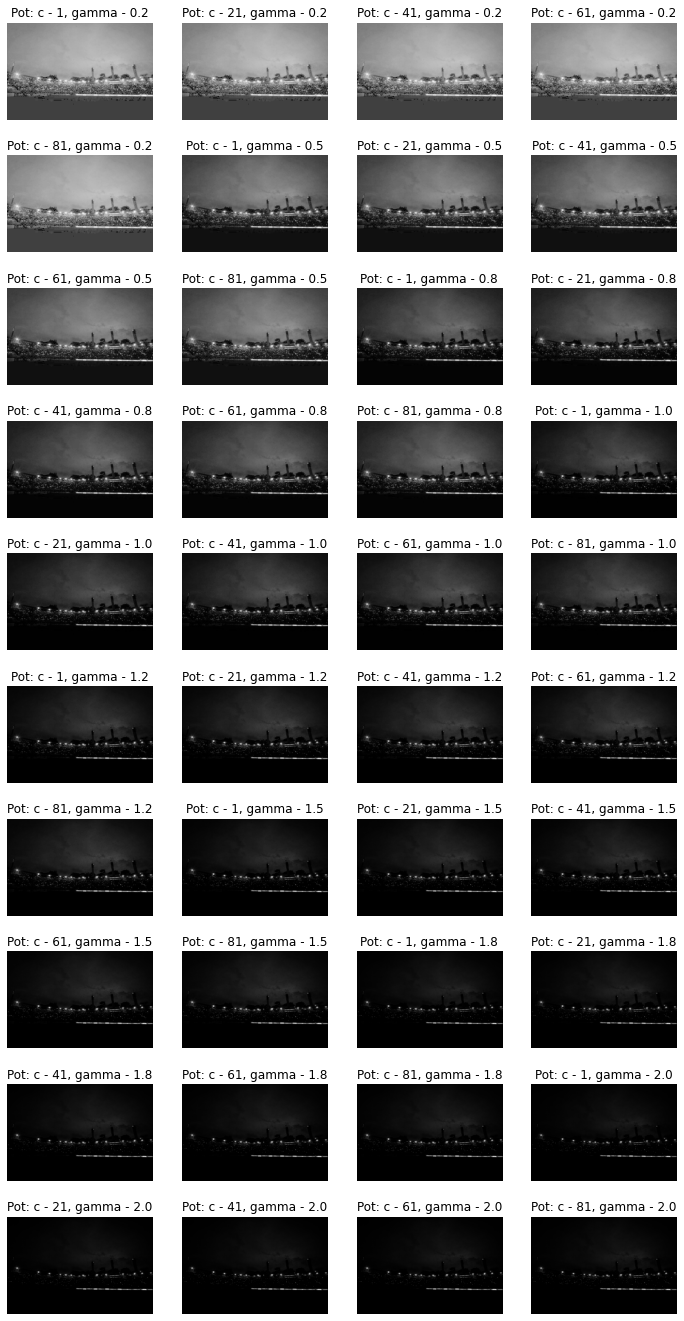

In [ ]:
c = np.arange(1, 101, 20)
gamma = np.arange(0.25, 2.25, .25)
C, GAMMA = np.meshgrid(c, gamma)
n = len(C.ravel())

fig, ax = plt.subplots(ncols = 4, nrows =  round(n/4), figsize = (12,24))
ax = ax.ravel()

for ax_,c_,gamma_ in zip(ax, C.ravel(), GAMMA.ravel()): 
  img = transform_pot(img_pacaembu, c = c_, gamma = gamma_, linear = True)
  ax_.imshow(img,"gray")
  ax_.set_title("Pot: c - "+str(round(c_,1))+", gamma - "+str(round(gamma_,1)))
  ax_.axis('off')
plt.show()

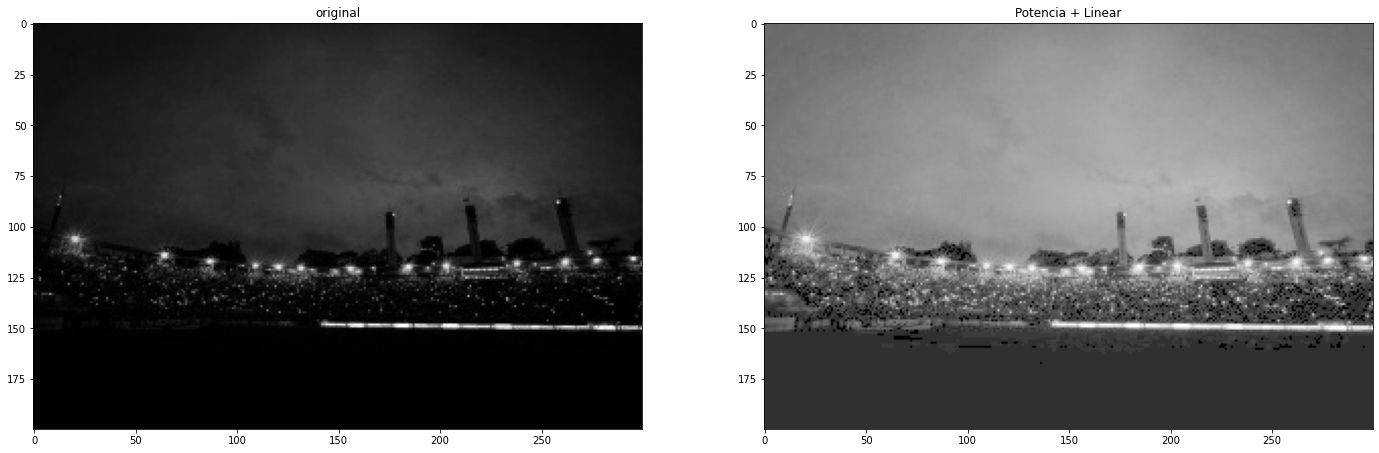

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize=(24,12))
ax = ax.ravel()

ax[1].imshow(transform_pot(img_pacaembu, c = 54, gamma = .3, linear = True),"gray")
ax[1].set_title('Potencia + Linear')

ax[0].imshow(img_pacaembu, "gray")
ax[0].set_title('original')

plt.show()